In [33]:
import math
import matplotlib.pyplot as plt
import numpy as np

### 1. Euclidean plane

Consider this 3 points on 2D space:  
$A=(4, 5)$  
$B=(-2, -4)$  
$C=(8, -1)$  

#### 1.1. Plot them using `matplotlib`  

In [8]:
A=(4, 5)
B=(-2, -4)
C=(8, -1)

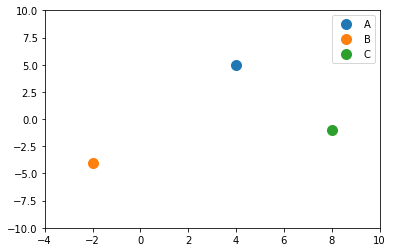

In [15]:
# create a plot
fig, ax = plt.subplots()

# add points. "o" stands for circle, "*" would be a star point
plt.plot(A[0], A[1], "o", markersize=10, label="A")
plt.plot(B[0], B[1], "o", markersize=10, label="B")
plt.plot(C[0], C[1], "o", markersize=10, label="C")

# set axis limits
ax.set_xlim([-4, 10])
ax.set_ylim([-10, 10])
# this adds top right legend for labeled elements
plt.legend()

#### 1.2. Which distance is longer, $AC, AB, \text{or} BC$? Write a function that calculates distance between two points.

In [16]:
A

(4, 5)

In [17]:
B

(-2, -4)

In [21]:
C

(8, -1)

In [22]:

# vertical segment 
ab1 = 5 - (-4)
ac1 = 5 - (-1)
bc1 = -4 - (-1)
# horizontal segment
ab2 = 4 - (-2)
ac2 = 4 - 8
bc2 = -2 - 8

In [23]:
dist_AB = math.sqrt(ab1 ** 2 + ab2 ** 2)
dist_AC = math.sqrt(ac1 ** 2 + ac2 ** 2)
dist_BC = math.sqrt(bc1 ** 2 + bc2 ** 2)

In [25]:
print(dist_AB)
print(dist_AC)
print(dist_BC)

10.816653826391969
7.211102550927978
10.44030650891055


#### 1.3. What is the perimeter of triangle $ABC$?

In [28]:
perimetro = dist_AB + dist_AC + dist_BC
perimetro

28.4680628862305

### 2. Linear functions

Consider the following straight lines on 2D space:  
$y_1=2x-3$  
$y_2=-3x+12$  

#### 2.1. Plot them

In [143]:
def initialize_grid(x1,y1):
    fig, ax = plt.subplots(figsize=(6, 6))
    
    # where do we want lines
    ticks = np.arange(x1, y1, 1)
    
    # draw grid
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.grid(True, which='both')
    
    # 1-1 X and Y proportion
    ax.set_aspect('equal')
    
    # X and Y axes
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    
    # set axes' limits
    ax.set_xlim([x1, y1])
    ax.set_ylim([x1, y1])

In [144]:
x = np.linspace(
    start=-10, 
    stop=10, 
    num=300
)

y1 = 2*x-3
y2 = -3*x+12

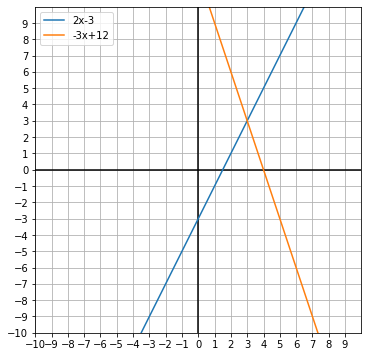

In [147]:
initialize_grid(-10,10)
# "-" for line type
plt.plot(x, y1, "-", markersize=10, label="2x-3")
plt.plot(x, y2, "-", markersize=10, label="-3x+12")

plt.legend()

#### 2.2. What are the respective slopes

In [ ]:
y1 slope = 2
y2 slope = -3

#### 2.3. Give 3 points through which $y_1$ goes through

In [ ]:
p1 = (0, -3)
p2 = (3, 3)
p3 = (7, 5)

#### 2.4. Where do they intersect?

In [ ]:
intersect = (3, 3)

#### 2.5. BONUS 

My yearly salary has increased **linearly** with my age:  
When I was 21 years old, I did 10000\\$ / year    
Today I am 39 years old, I am doing 33400\\$ / year  
How much will I do when I get 50 years old?

In [94]:
slope = (33400-10000) / (39-21)
slope

1300.0

In [95]:
intercept = 33400 - slope*39
intercept

-17300.0

In [96]:
age50 = slope*50+intercept

In [97]:
age50

47700.0

In [101]:
age21 = slope*21+intercept
age21

10000.0

In [125]:
age = np.linspace(
    start=21, 
    stop=50, 
    num=10
)

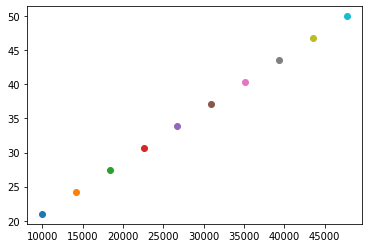

In [126]:
plt.plot([slope*age+intercept], [age], "o")

### 3. Polynomials

Consider these different degree polynomials:  
$y_2=x^2-3x-10$  
$y_3=x^3-2x^2+5x+1$  
$y_4=x^4-x^3+x^2-x+1$  

#### 3.1. Plot them

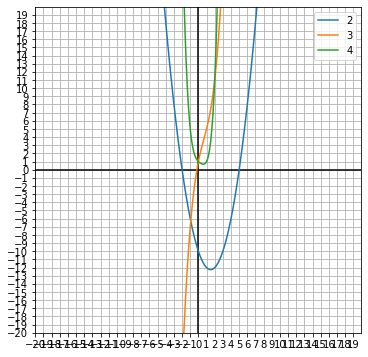

In [148]:
initialize_grid(-20,20)
y2 = x ** 2 - 3 * x -10
y3 = x ** 3 - 2 * x ** 2 + 5 * x + 1 
y4 = x ** 4 - x ** 3 + x ** 2 - x + 1

plt.plot(x, y2, "-", label="2")
plt.plot(x, y3, "-", label="3")
plt.plot(x, y4, "-", label="4")

plt.legend()

#### 3.2. Which one takes a bigger value on $x=0$? On $x=2$? On $x=100$?

In [155]:
x = 0
y2 = x ** 2 - 3 * x -10
y3 = x ** 3 - 2 * x ** 2 + 5 * x + 1 
y4 = x ** 4 - x ** 3 + x ** 2 - x + 1
print(y2,y3,y4)

-10 1 1


In [130]:
x = 2
y2 = x ** 2 - 3 * x -10
y3 = x ** 3 - 2 * x ** 2 + 5 * x + 1 
y4 = x ** 4 - x ** 3 + x ** 2 - x + 1
print(y2,y3,y4)

-12 11 11


In [129]:
x = 100
y2 = x ** 2 - 3 * x -10
y3 = x ** 3 - 2 * x ** 2 + 5 * x + 1 
y4 = x ** 4 - x ** 3 + x ** 2 - x + 1
print(y2,y3,y4)

9690 980501 99009901


#### 3.3. Who is the vertex of parabola $y_2$?

In [ ]:
vertex = (-1.5, -10)

#### 3.4. Where does $y_2$ intersect X axis? And Y axis?

When x = 0 so as we saw in the 3.2, in (0,-10) intersect x axis
When y = 0 so as we saw in the 3.2, in (0,-10) intersect y axis

In [151]:
x=5
y2 = x ** 2 - 3 * x -10
print(y2)

0


#### 3.5. As x gets very big, what happens to $y$ go in each case?

In [ ]:
Go bigger also

#### 3.6. As x gets very small (big negative), what happens to $y$ go in each case?

In [ ]:
y2 get bigger
y3 get smaller
y4 get bigger

### 4. Exponential

#### 4.1. Print number $e$ rounded to 3 decimal figures

In [158]:
round(np.e,3)

2.718

#### 4.2. Compute $e$ to the powers 0, 1, 2, 3, 10

In [163]:
print(np.log(0))
print(np.log(1))
print(np.log(2))
print(np.log(3))
print(np.log(10))

-inf
0.0
0.6931471805599453
1.0986122886681098
2.302585092994046


<ipython-input-163-8d88309f10ae>:1: RuntimeWarning: divide by zero encountered in log
  print(np.log(0))


#### 4.3. Compute $e$ to the powers 0, -1, -2, -3, -10

In [164]:
print(np.log(0))
print(np.log(-1))
print(np.log(-2))
print(np.log(-3))
print(np.log(-10))

-inf
nan
nan
nan
nan


<ipython-input-164-196bae5fc601>:1: RuntimeWarning: divide by zero encountered in log
  print(np.log(0))
<ipython-input-164-196bae5fc601>:2: RuntimeWarning: invalid value encountered in log
  print(np.log(-1))
<ipython-input-164-196bae5fc601>:3: RuntimeWarning: invalid value encountered in log
  print(np.log(-2))
<ipython-input-164-196bae5fc601>:4: RuntimeWarning: invalid value encountered in log
  print(np.log(-3))
<ipython-input-164-196bae5fc601>:5: RuntimeWarning: invalid value encountered in log
  print(np.log(-10))


#### 4.4. Plot functions $e^x$, $e^{2x}$, $e^{-x}$

Note: choose an appropiate x-range to visualize them all toguether

In [168]:
x = np.linspace(
    start=-10, 
    stop=10, 
    num=300
)

<ipython-input-175-2326a5867cc8>:4: RuntimeWarning: invalid value encountered in log
  y = np.log(x)
<ipython-input-175-2326a5867cc8>:5: RuntimeWarning: invalid value encountered in log
  y2 = np.log(2*x)
<ipython-input-175-2326a5867cc8>:6: RuntimeWarning: invalid value encountered in log
  y3 = np.log(-x)


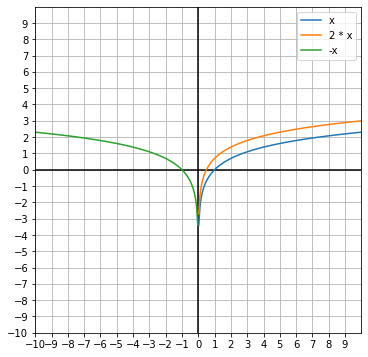

In [175]:
initialize_grid(-10,10)

# base e (logaritmo neperiano)
y = np.log(x)
y2 = np.log(2*x)
y3 = np.log(-x)

plt.plot(x, y, "-", label="x")
plt.plot(x, y2, "-", label="2 * x")
plt.plot(x, y3, "-", label="-x")

plt.legend()

### 5. Sum notation

Find the following:

$$\sum_{n=4}^7 n$$

In [176]:
4+5+6+7

22

$$\sum_{n=-2}^3 (n + 1)$$

In [177]:
((-2) + 1) + ((-1)+ 1) + (0+ 1) + (1 + 1) + (2 + 1) + (3 + 1)

9

$$\sum_{n=-2}^3 (n^2 - 2)$$

In [179]:
((-2)**2 -2) + ((-1)**2 -2) + (0**2 -2) + (1**2 -2) + (2**2 -2) + (3**2 -2)

7

$$\sum_{n=0}^4 (10^n - 1)$$

In [178]:
(10**0 -1) + (10**1 -1) + (10**2 -1) + (10**3 -1) + (10**4 -1)

11106

### 6. Combinatorics

#### 6.1. Ten people go to a party. How many handshakes happen?

In [182]:
10 * 10

100

#### 6.2. My family is composed of 11 members. By christmas, one buys food, one cooks and one cleans. How many possible arrangements of buyer-cooker-cleaner are there?

In [183]:
11*10*9

990

### BONUS

11 and 13 are twin primes, since:
 - they are both primes  
 - their distance is 2
 
Find all pairs of twin primes below 1000

In [216]:
is_perfect(6)

True

In [225]:
def es_primo(num):
    for n in range(2, num):
        if num % n == 0:
            return False
    return True

In [283]:
prime_n = []
twin = []
for i in range (1,1000):
    if es_primo(i) == True:
        prime_n.append(i)